# <center style="">Lab 2: Decision Tree</center>

- Student's name: Phan Thanh An
- Student's ID: 21127003
- Class: 21CLC07

## Mục lục
* [1. Importing necessary libraries](#c1)
* [2. Preparing the dataset](#c2)
    * [2.1. Preparing helper function for visualizing data and make subset](#c21)
    * [2.2. Preparing subset ](#c22)
        * [2.2.1. (40/60) subset](#c221)
        * [2.2.2. (60/40) subset](#c222)
        * [2.2.3. (80/20) subset](#c223)
        * [2.2.4. (90/10) subset](#c224)
* [3. Build the decision tree classifiers](#c3)
    * [3.1. Decision tree classifiers for dataset (40/60)](#c31)
    * [3.2. Decision tree classifiers for dataset (60/40)](#c32)
    * [3.3. Decision tree classifiers for dataset (80/20)](#c32)
    * [3.4. Decision tree classifiers for dataset (90/10)](#c34)
    



## <a class="anchor" id="c1"> 1. Importing necessary libraries

In [1]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix

from sklearn import tree

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import graphviz

## <a class="anchor" id="c2"> 2. Preparing the dataset

In [2]:
datasets = pd.read_csv(f'data/nursery.csv', header=None)
datasets = datasets.apply(LabelEncoder().fit_transform)

original_features = datasets.iloc[:, :-1]
original_labels = datasets[datasets.columns[-1]]

### <a class="anchor" id="c21"> 2.1 Preparing helper function for visualizing data and make subset

In [3]:
def visualize_subset(subset, title="Distribution of Labels"):
    global original_labels # original labels
    train_features, test_features, train_labels, test_labels = subset
    
    class_names = ["Not Recommend", "Priority", "Recommend", "Special Priority", "Very Recommend"]
    
    count_original = pd.Series(original_labels).value_counts()
    count_train = pd.Series(train_labels).value_counts()
    count_test = pd.Series(test_labels).value_counts()

    frame = pd.DataFrame({'Original': count_original, 'Training': count_train, 'Testing': count_test})
    
    sns.set(style="whitegrid")
    
    fig, ax = plt.subplots(figsize=(10, 10))
    
    plot = frame.plot(kind='bar', xlabel="Labels", ylabel="Count", title=title, color=['#E63946', '#2A9D8F', '#F4A261'], ax=ax)
    
    # Label each bar with the count value at a 90-degree angle
    for container in plot.containers:
        plot.bar_label(container, fmt='%d', label_type='edge', fontsize=10, rotation=45)
    
    plot.set_xticklabels(class_names, rotation=0, ha="center")
    plot.grid(axis='y', linestyle='--', alpha=0.7)
    
    plt.title(title, fontsize=16)
    plt.xlabel("Labels", fontsize=14)
    plt.ylabel("Count", fontsize=14)
    
    plt.subplots_adjust(bottom=0.60)
    
    plt.show()

#### Make Subset
- ```features```: This argument represents the input features of dataset. These could be various attributes or measurements that you use as input for your machine learning model.

- ```labels```: This argument represents the corresponding labels or targets associated with each set of features. In a supervised machine learning context, these labels represent the expected outputs that the model should learn to predict.

- ```ratios```: This argument is a list containing two values. The first value ratios[0] represents the ratio of the dataset that should be used for training, and the second value ratios[1] represents the ratio of the dataset that should be used for testing.

In [4]:
def make_subset(features, labels, ratios):
    # (train_features, test_features, train_labels, test_labels)
    subset =  train_test_split(
        features, 
        labels, 
        test_size=ratios[1], 
        train_size=ratios[0], 
        random_state=42, 
        shuffle=True
    )
    
    return subset

### <a class="anchor" id="c22"> 2.2. Preparing subset

In [5]:
subsets = []

### <a class="anchor" id="c221"> 2.2.1. (40/60) subset

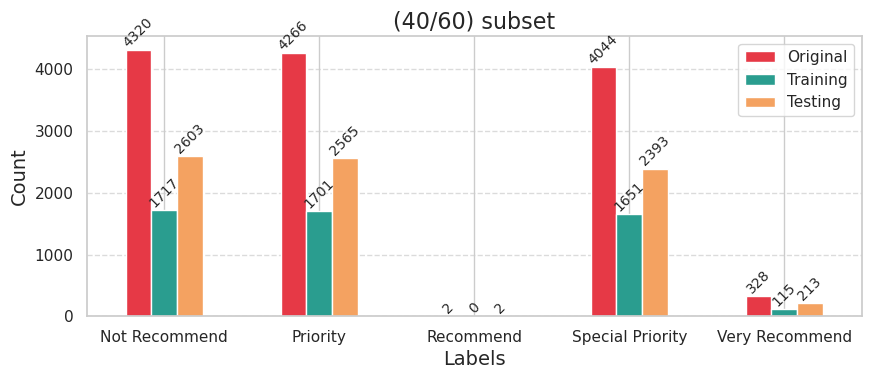

In [6]:
ratios = [0.4, 0.6]

subset = make_subset(original_features, original_labels, ratios)
subsets.append(subset)

visualize_subset(subset, title="(40/60) subset")

### <a class="anchor" id="c222"> 2.2.2. (60/40) dataset

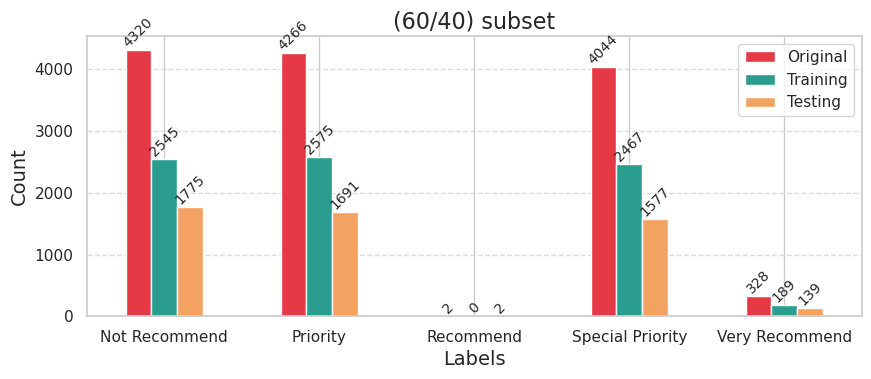

In [7]:
ratios = [0.6, 0.4]

subset = make_subset(original_features, original_labels, ratios)
subsets.append(subset)

visualize_subset(subset, title="(60/40) subset")

### <a class="anchor" id="c223"> 2.2.3. (80/20) dataset

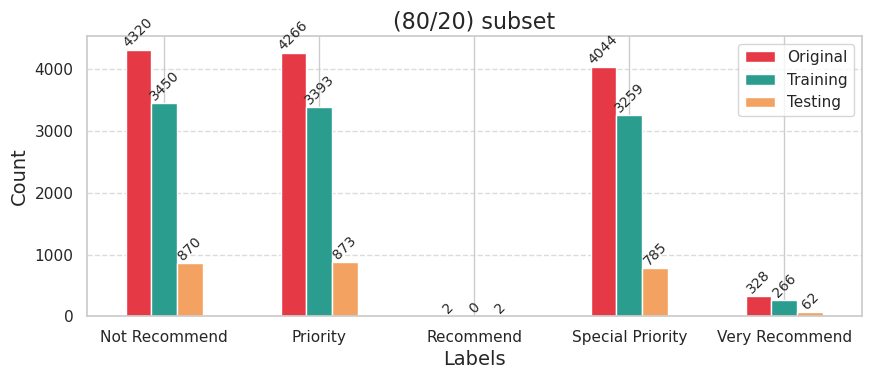

In [8]:
ratios = [0.8, 0.2]

subset = make_subset(original_features, original_labels, ratios)
subsets.append(subset)

visualize_subset(subset, title="(80/20) subset")

### <a class="anchor" id="c224"> 2.2.4. (90/10) dataset

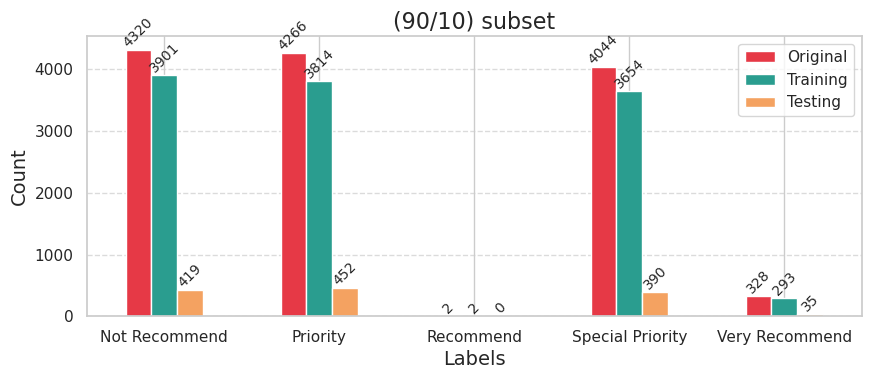

In [9]:
ratios = [0.9, 0.1]

subset = make_subset(original_features, original_labels, ratios)
subsets.append(subset)

visualize_subset(subset, title="(90/10) subset")

## <a class="anchor" id="c3"> 3. Building the decision tree classifiers

In [10]:
trees = [None] * 4

- ```parents```:        usual, pretentious, great_pret 
- ```has_nurs```:       proper, less_proper, improper, critical, very_crit
- ```form```:           complete, completed, incomplete, foster
- ```children```:       1, 2, 3, more
- ```housing```:        convenient, less_conv, critical
- ```finance```:        convenient, inconv
- ```social```:         non-prob, slightly_prob, problematic
- ```health```:         recommended, priority, not_recom

In [11]:
feature_names=["parent", "has_nurs", "form", "children", "housing", "finance", "social", "health"]
class_names = ["Not Recommend", "Priority", "Recommend", "Special Priority", "Very Recommend"]

### <a class="anchor" id="c31"> 3.1 Decision tree classifiers for dataset (40/60)

```criterion{“gini”, “entropy”, “log_loss”}, default=”gini”```
The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “log_loss” and “entropy” both for the Shannon information gain, see Mathematical formulation.

In [12]:
feature_train, feature_test, label_train, label_test = subsets[0]
trees[0] = DecisionTreeClassifier(criterion = 'entropy', random_state = 0, max_depth = 7)
trees[0].fit(feature_train, label_train.ravel())

DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=0)

In [13]:
data = tree.export_graphviz(
    trees[0], 
    out_file = None, 
    feature_names = feature_names, 
    class_names = class_names, 
    filled = True, 
    max_depth = 7, 
    special_characters = True
)

In [14]:
graph = graphviz.Source(data)
graph.render("decision_tree_export/decision_tree_40_60", format = "pdf", cleanup=True)
print("Decision Tree was exportted to folder decision_tree_export")

Decision Tree was exportted to folder decision_tree_export


### <a class="anchor" id="c32"> 3.2 Decision tree classifiers for dataset (60/40)

In [15]:
feature_train, feature_test, label_train, label_test = subsets[1]
trees[1] = DecisionTreeClassifier(criterion = 'entropy', random_state = 0, max_depth = 7)
trees[1].fit(feature_train, label_train.ravel())

DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=0)

In [16]:
data = tree.export_graphviz(
    trees[1], 
    out_file = None, 
    feature_names = feature_names, 
    class_names = class_names, 
    filled = True, 
    max_depth = 7, 
    special_characters = True
)

In [17]:
graph = graphviz.Source(data)
graph.render("decision_tree_export/decision_tree_60_40", format = "pdf", cleanup=True)
print("Decision Tree was exportted to folder decision_tree_export")

Decision Tree was exportted to folder decision_tree_export


### <a class="anchor" id="c33"> 3.3 Decision tree classifiers for dataset (80/20)

In [18]:
feature_train, feature_test, label_train, label_test = subsets[2]
trees[2] = DecisionTreeClassifier(criterion = 'entropy', random_state = 0, max_depth = 7)
trees[2].fit(feature_train, label_train.ravel())

DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=0)

In [19]:
data = tree.export_graphviz(
    trees[2], 
    out_file = None, 
    feature_names = feature_names, 
    class_names = class_names, 
    filled = True, 
    max_depth = 7, 
    special_characters = True
)

In [20]:
graph = graphviz.Source(data)
graph.render("decision_tree_export/decision_tree_80_20", format = "pdf", cleanup=True)
print("Decision Tree was exportted to folder decision_tree_export")

Decision Tree was exportted to folder decision_tree_export


### <a class="anchor" id="c34"> 3.4 Decision tree classifiers for dataset (90/10)

In [21]:
feature_train, feature_test, label_train, label_test = subsets[3]

trees[3] = DecisionTreeClassifier(criterion = 'entropy', random_state = 0, max_depth = 7)

trees[3].fit(feature_train, label_train.ravel())

DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=0)

In [22]:
data = tree.export_graphviz(
    trees[3], 
    out_file = None, 
    feature_names = feature_names, 
    class_names = class_names, 
    filled = True, 
    max_depth = 7, 
    special_characters = True
)

In [23]:
graph = graphviz.Source(data)
graph.render("decision_tree_export/decision_tree_90_10", format = "pdf", cleanup=True)
print("Decision Tree was exportted to folder decision_tree_export")

Decision Tree was exportted to folder decision_tree_export


## <a class="anchor" id="c4"> 4. Evaluating the decision tree classifiers

### <a class="anchor" id="c41"> 4.1 Evaluating decision tree classifiers for dataset (40/60)

In [24]:
class_names = ["Not Recommend", "Priority", "Recommend", "Special Priority", "Very Recommend"]
_, feature_test, _, label_test = subsets[0]
label_pred = trees[0].predict(feature_test)

In [25]:
print(classification_report(label_test, label_pred, target_names = class_names, zero_division = 1))

                  precision    recall  f1-score   support

   Not Recommend       1.00      1.00      1.00      2603
        Priority       0.89      0.81      0.85      2565
       Recommend       1.00      0.00      0.00         2
Special Priority       0.84      0.94      0.89      2393
  Very Recommend       0.58      0.49      0.53       213

        accuracy                           0.90      7776
       macro avg       0.86      0.65      0.65      7776
    weighted avg       0.90      0.90      0.90      7776



Confusion Matrix 
 [[2603    0    0    0    0]
 [   0 2069    0  423   73]
 [   0    0    0    0    2]
 [   0  138    0 2255    0]
 [   0  109    0    0  104]]


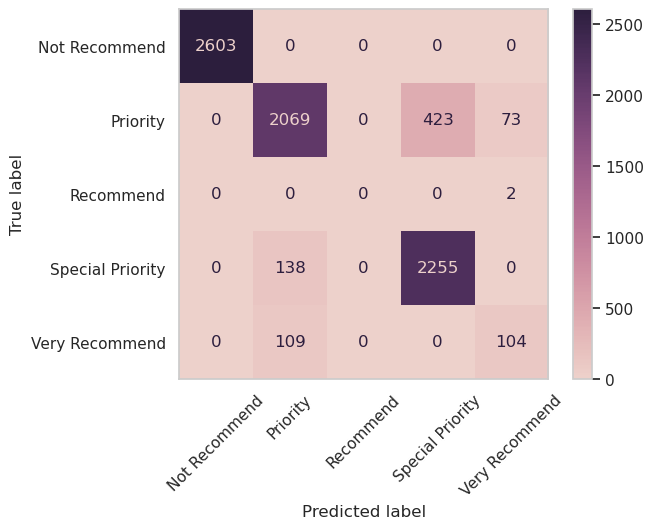

In [26]:
cfm = confusion_matrix(
    label_test,
    label_pred,
)
print("Confusion Matrix \n", cfm)


disp = ConfusionMatrixDisplay.from_predictions(
    label_test, 
    label_pred, 
    display_labels = class_names, 
    xticks_rotation = 45,
    cmap=sns.cubehelix_palette(as_cmap=True)
)

plt.grid(False)

### <a class="anchor" id="c42"> 4.2 Evaluating decision tree classifiers for dataset (60/40)

In [27]:
class_names = ["Not Recommend", "Priority", "Recommend", "Special Priority", "Very Recommend"]
_, feature_test, _, label_test = subsets[1]
label_pred = trees[1].predict(feature_test)

In [28]:
print(classification_report(label_test, label_pred, target_names = class_names, zero_division = 1))

                  precision    recall  f1-score   support

   Not Recommend       1.00      1.00      1.00      1775
        Priority       0.91      0.82      0.86      1691
       Recommend       1.00      0.00      0.00         2
Special Priority       0.84      0.96      0.90      1577
  Very Recommend       0.70      0.37      0.49       139

        accuracy                           0.91      5184
       macro avg       0.89      0.63      0.65      5184
    weighted avg       0.91      0.91      0.91      5184



Confusion Matrix 
 [[1775    0    0    0    0]
 [   0 1382    0  289   20]
 [   0    0    0    0    2]
 [   0   58    0 1519    0]
 [   0   87    0    0   52]]


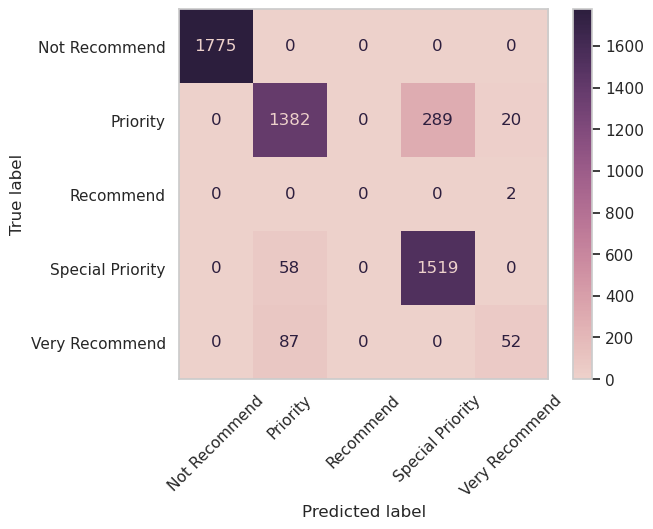

In [29]:
cfm = confusion_matrix(
    label_test,
    label_pred,
)
print("Confusion Matrix \n", cfm)


disp = ConfusionMatrixDisplay.from_predictions(
    label_test, 
    label_pred, 
    display_labels = class_names, 
    xticks_rotation = 45,
    cmap=sns.cubehelix_palette(as_cmap=True)
)

plt.grid(False)

### <a class="anchor" id="c43"> 4.3 Evaluating decision tree classifiers for dataset (80/20)

In [30]:
class_names = ["Not Recommend", "Priority", "Recommend", "Special Priority", "Very Recommend"]
_, feature_test, _, label_test = subsets[2]
label_pred = trees[2].predict(feature_test)

In [31]:
print(classification_report(label_test, label_pred, target_names = class_names, zero_division = 1))

                  precision    recall  f1-score   support

   Not Recommend       1.00      1.00      1.00       870
        Priority       0.92      0.85      0.88       873
       Recommend       1.00      0.00      0.00         2
Special Priority       0.86      0.96      0.91       785
  Very Recommend       0.70      0.42      0.53        62

        accuracy                           0.92      2592
       macro avg       0.90      0.65      0.66      2592
    weighted avg       0.92      0.92      0.92      2592



Confusion Matrix 
 [[870   0   0   0   0]
 [  0 743   0 121   9]
 [  0   0   0   0   2]
 [  0  32   0 753   0]
 [  0  36   0   0  26]]


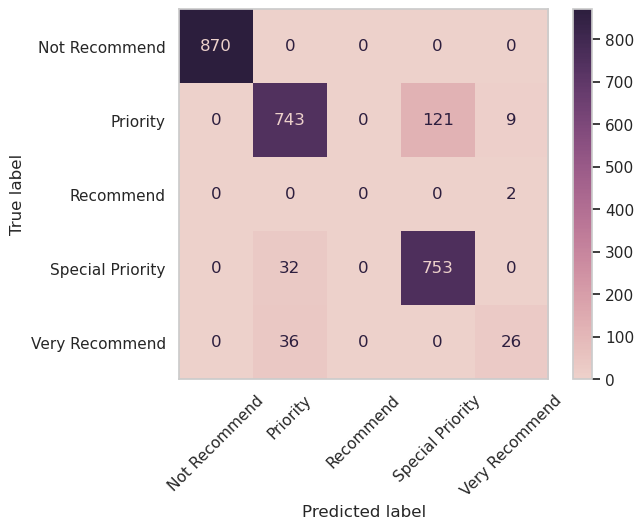

In [32]:
cfm = confusion_matrix(
    label_test,
    label_pred,
)
print("Confusion Matrix \n", cfm)

disp = ConfusionMatrixDisplay.from_predictions(
    label_test, 
    label_pred, 
    display_labels = class_names, 
    xticks_rotation = 45,
    cmap=sns.cubehelix_palette(as_cmap=True)
)

plt.grid(False)

### <a class="anchor" id="c44"> 4.4 Evaluating decision tree classifiers for dataset (90/10)

In [33]:
class_names = ["Not Recommend", "Priority", "Special Priority", "Very Recommend"]
_, feature_test, _, label_test = subsets[3]
label_pred = trees[3].predict(feature_test)

In [34]:
print(classification_report(label_test, label_pred, target_names = class_names, zero_division = 1))

                  precision    recall  f1-score   support

   Not Recommend       1.00      1.00      1.00       419
        Priority       0.89      0.84      0.86       452
Special Priority       0.84      0.94      0.89       390
  Very Recommend       0.71      0.29      0.41        35

        accuracy                           0.91      1296
       macro avg       0.86      0.77      0.79      1296
    weighted avg       0.91      0.91      0.90      1296



Confusion Matrix 
 [[419   0   0   0]
 [  0 378  70   4]
 [  0  22 368   0]
 [  0  25   0  10]]


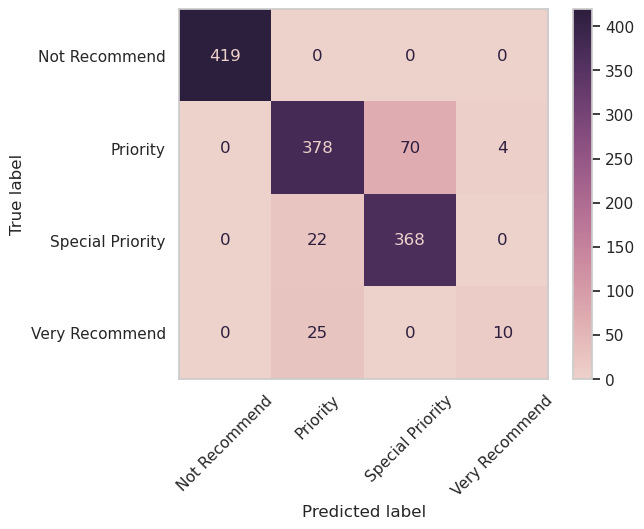

In [35]:
cfm = confusion_matrix(
    label_test,
    label_pred,
)
print("Confusion Matrix \n", cfm)


disp = ConfusionMatrixDisplay.from_predictions(
    label_test, 
    label_pred, 
    display_labels = class_names, 
    xticks_rotation = 45,
    cmap=sns.cubehelix_palette(as_cmap=True)
)

plt.grid(False)

## <a class="anchor" id="c5"> 5. The depth and accuracy of a decision tree (dataset 80/20)

In [36]:
feature_train, feature_test, label_train, label_test = subsets[2]

### <a class="anchor" id="c51"> 5.1. Max depth = None

In [37]:
tree_depth = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
tree_depth.fit(feature_train, label_train.ravel())

DecisionTreeClassifier(criterion='entropy', random_state=0)

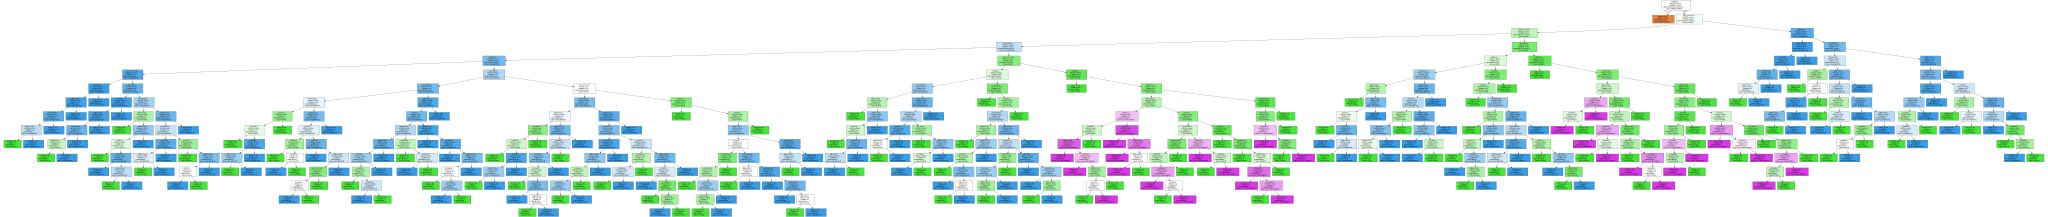

In [38]:
data = tree.export_graphviz(
    tree_depth, out_file = None, 
    feature_names = feature_names, 
    class_names=class_names, 
    filled=True, 
    special_characters = True
)
graph = graphviz.Source(data)
graph

In [39]:
label_depth = tree_depth.predict(feature_test)
accuracy_score(label_test, label_depth)

0.9953703703703703

### <a class="anchor" id="c52"> 5.2. Max depth = 2

In [40]:
tree_depth = DecisionTreeClassifier(criterion = 'entropy', random_state = 0, max_depth = 2)
tree_depth.fit(feature_train, label_train.ravel())

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=0)

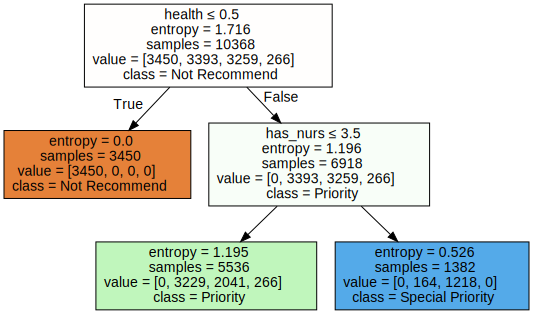

In [41]:
data = tree.export_graphviz(
    tree_depth, 
    out_file = None, 
    feature_names = feature_names, 
    class_names=class_names, 
    filled=True, 
    max_depth = 2, 
    special_characters = True
)
graph = graphviz.Source(data)
graph

In [42]:
label_depth = tree_depth.predict(feature_test)
accuracy_score(label_test, label_depth)

0.7704475308641975

### <a class="anchor" id="c53"> 5.3. Max depth = 3

In [43]:
tree_depth = DecisionTreeClassifier(criterion = 'entropy', random_state = 0, max_depth = 3)
tree_depth.fit(feature_train, label_train.ravel())

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

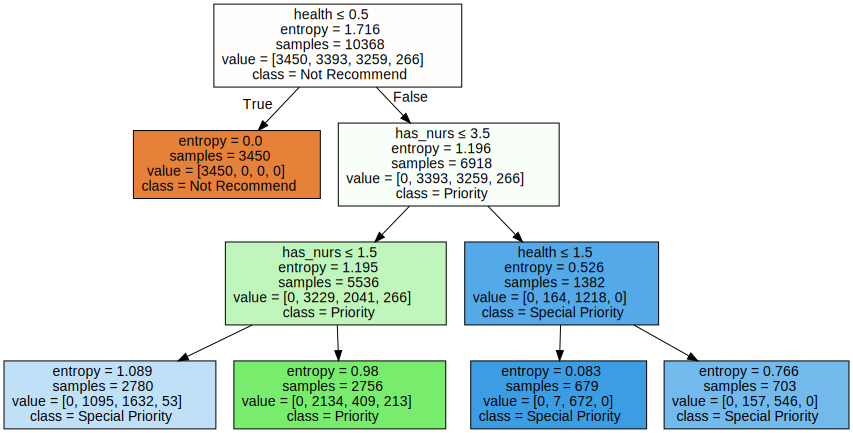

In [44]:
data = tree.export_graphviz(
    tree_depth, 
    out_file = None, 
    feature_names = feature_names, 
    class_names=class_names, 
    filled=True, 
    max_depth = 3, 
    special_characters = True
)
graph = graphviz.Source(data)
graph

In [45]:
label_depth = tree_depth.predict(feature_test)
accuracy_score(label_test, label_depth)

0.8155864197530864

### <a class="anchor" id="c54"> 5.4. Max depth = 4

In [46]:
tree_depth = DecisionTreeClassifier(criterion = 'entropy', random_state = 0, max_depth = 4)
tree_depth.fit(feature_train, label_train.ravel())

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)

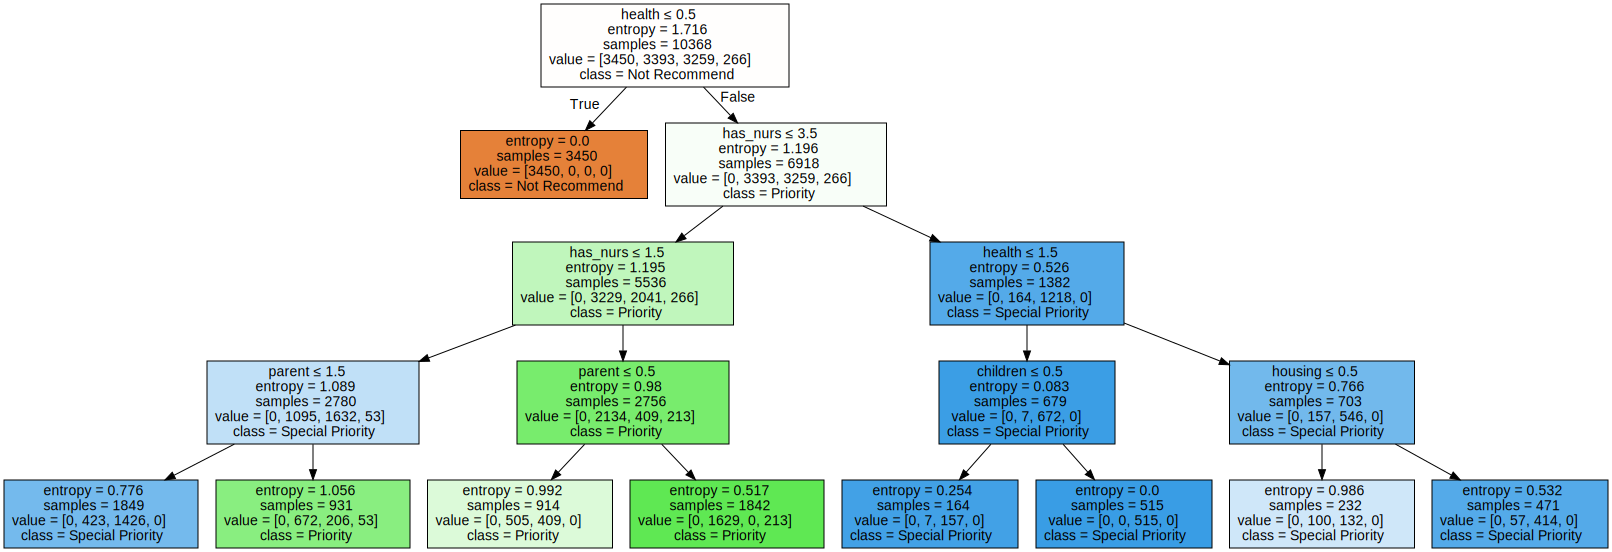

In [47]:
data = tree.export_graphviz(
    tree_depth, 
    out_file = None, 
    feature_names = feature_names, 
    class_names=class_names, 
    filled=True, 
    max_depth = 4, 
    special_characters = True
)
graph = graphviz.Source(data)
graph

In [48]:
label_depth = tree_depth.predict(feature_test)
accuracy_score(label_test, label_depth)

0.8603395061728395

### <a class="anchor" id="c55"> 5.5. Max depth = 5

In [49]:
tree_depth = DecisionTreeClassifier(criterion = 'entropy', random_state = 0, max_depth = 5)
tree_depth.fit(feature_train, label_train.ravel())

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)

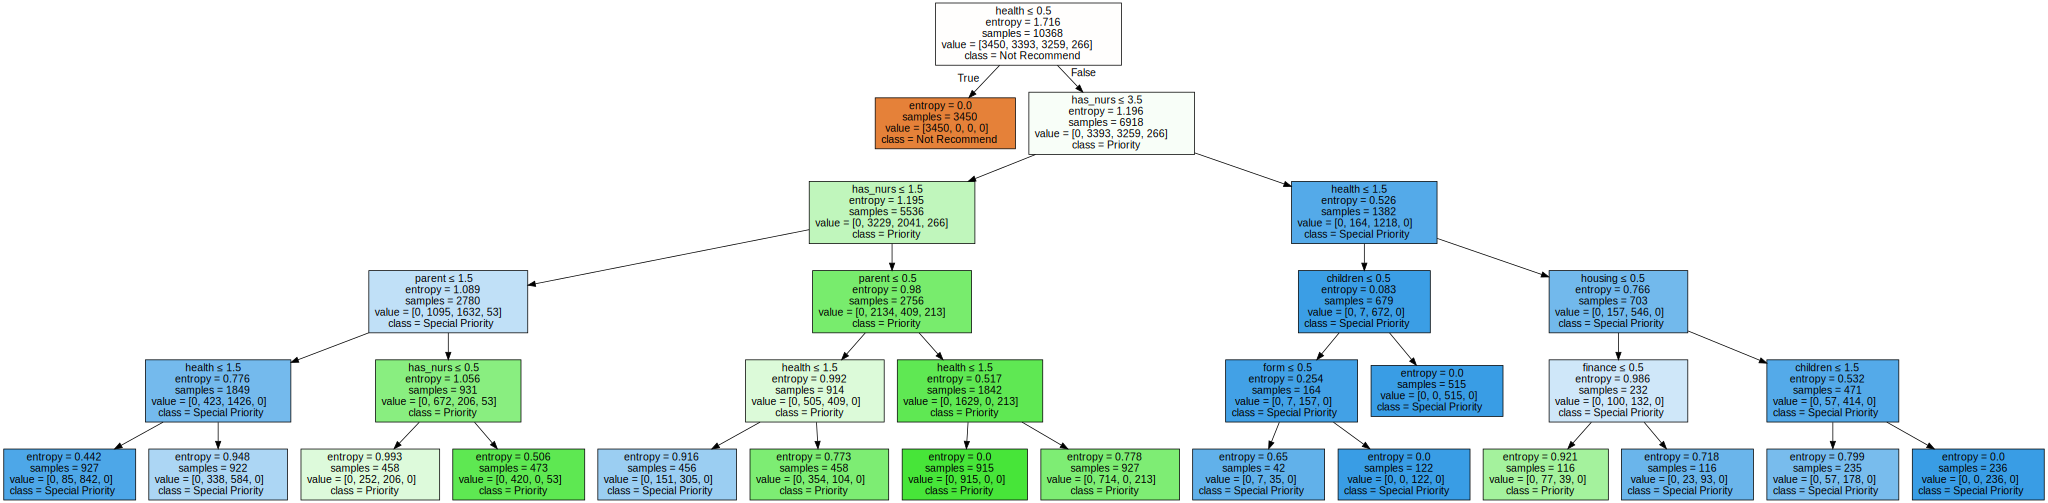

In [50]:
data = tree.export_graphviz(
    tree_depth, 
    out_file = None, 
    feature_names = feature_names, 
    class_names=class_names, 
    filled=True, 
    max_depth = 5, 
    special_characters = True
)
graph = graphviz.Source(data)
graph

In [51]:
label_depth = tree_depth.predict(feature_test)
accuracy_score(label_test, label_depth)

0.8765432098765432

### <a class="anchor" id="c56"> 5.6. Max depth = 6

In [52]:
tree_depth = DecisionTreeClassifier(criterion = 'entropy', random_state = 0, max_depth = 6)
tree_depth.fit(feature_train, label_train.ravel())

DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=0)

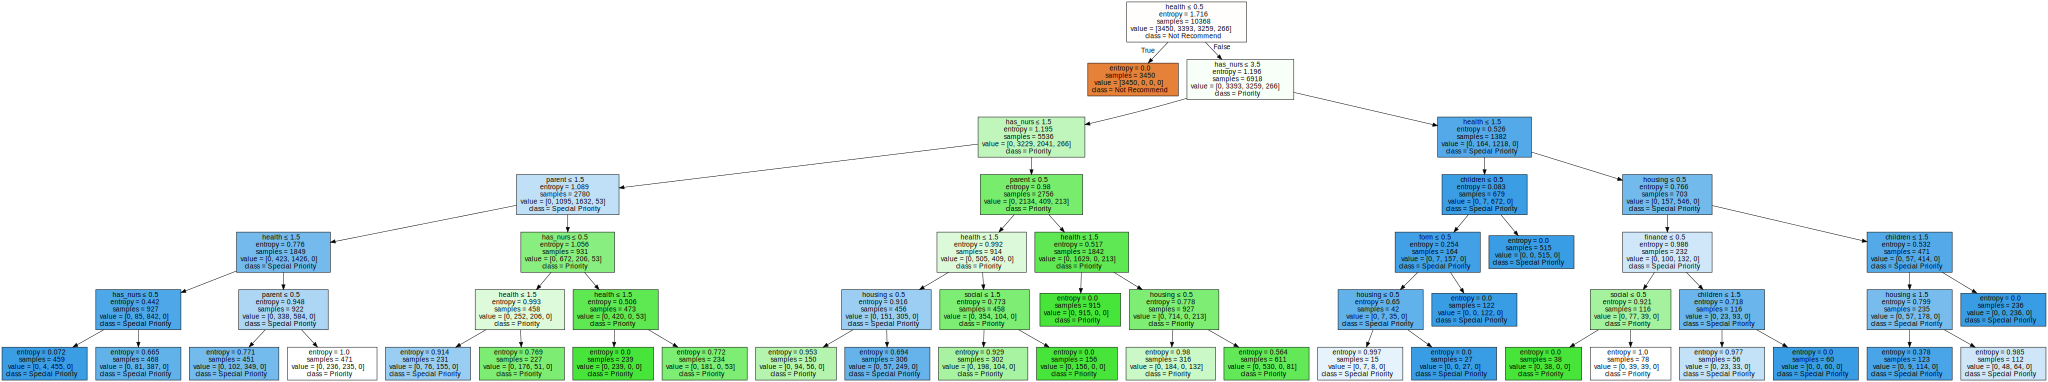

In [53]:
data = tree.export_graphviz(
    tree_depth, 
    out_file = None, 
    feature_names = feature_names, 
    class_names=class_names, 
    filled=True, 
    max_depth = 6, 
    special_characters = True
)
graph = graphviz.Source(data)
graph

In [54]:
label_depth = tree_depth.predict(feature_test)
accuracy_score(label_test, label_depth)

0.8919753086419753

### <a class="anchor" id="c57"> 5.7. Max depth = 7

In [55]:
tree_depth = DecisionTreeClassifier(criterion = 'entropy', random_state = 0, max_depth = 7)
tree_depth.fit(feature_train, label_train.ravel())

DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=0)

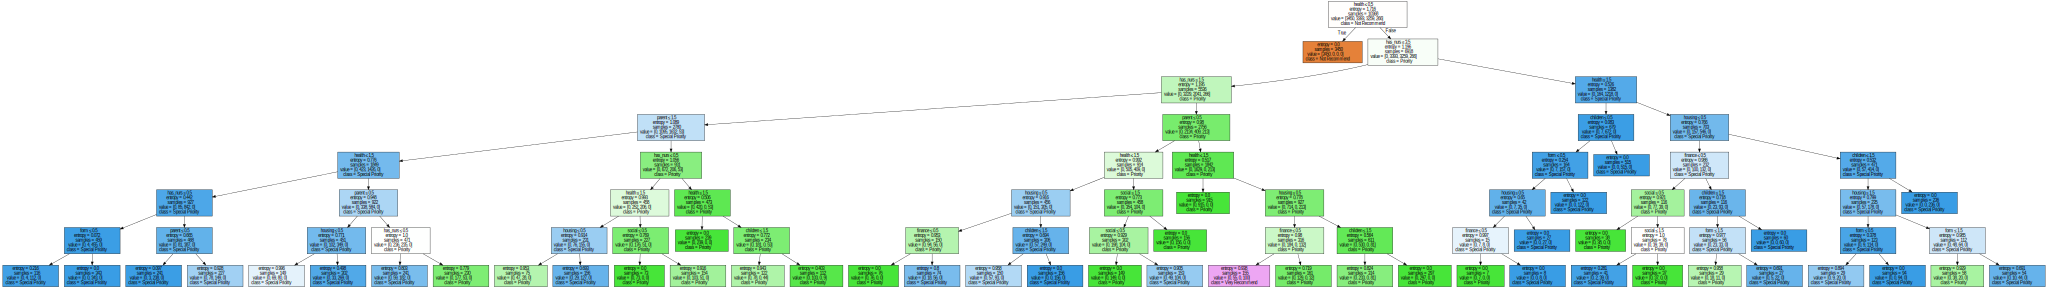

In [56]:
data = tree.export_graphviz(
    tree_depth, 
    out_file = None, 
    feature_names = feature_names, 
    class_names=class_names, 
    filled=True, 
    max_depth = 7, 
    special_characters = True
)
graph = graphviz.Source(data)
graph

In [57]:
label_depth = tree_depth.predict(feature_test)
accuracy_score(label_test, label_depth)

0.9228395061728395